Titanic project / Linear regresion<br>
<img src="https://raw.githubusercontent.com/Genereux-akotenou/DataScience_Projects/main/Titanic_Project/favicon.jpg" alt=""/>

**Setup and imports**
<p>We have to install sklearn  ans import these modules</p>

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

**Dataset**
<p>Bellow we'll load a titanic dataset and learn how we can explore it using some built-in ools</p>

In [2]:
# training data
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
# testing data
df_eval  = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [3]:
df_train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


**Data visualization**

In [4]:
df_train.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


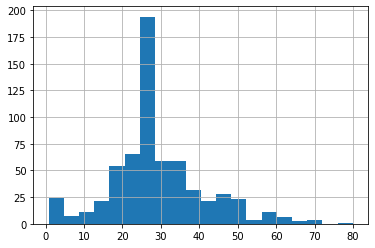

In [5]:
df_train.age.hist(bins=20)

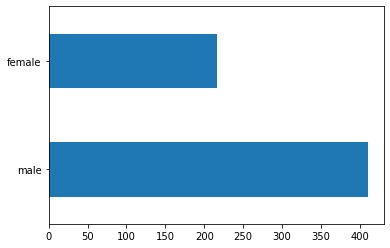

In [6]:
df_train.sex.value_counts().plot(kind='barh')

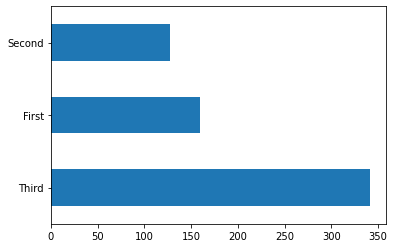

In [7]:
df_train['class'].value_counts().plot(kind='barh')

In [8]:
# retreive label from training and evaluation dataset
y_train = df_train.pop('survived')
y_eval  = df_eval.pop('survived')

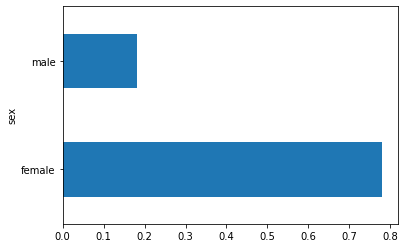

In [9]:
pd.concat([df_train, y_train], axis=1).groupby('sex').survived.mean().plot(kind="barh")

After the exploration of this dataset we should notice that
<ul>
  <li>The majority of the passager are intheir 20's or 30's</li>
  <li>The majority of passager are male</li>
  <li>The majority of passager are in the third class</li>
  <li>Female have highter chance of survival, may be due to the sense of sacrifice and gallantry on the part of men 😎️</li>
</ul>

**Features classification**

In [10]:
NUMERICAL_DATA = ['age','fare']
CATEGORICAL_DATA = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']

feature_columns = []
for feature_name in NUMERICAL_DATA:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

for feature_name in CATEGORICAL_DATA:
  vocabulary = df_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

In [11]:
print(feature_columns)

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southamp

**Training process**
<ul>
  <li>Input function</li>
</ul>

In [12]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      # randomize order of data
      ds = ds.shuffle(2000)
    # split dataset into batch of 32 and repeat process for number of epoch
    ds = ds.batch(batch_size).repeat(num_epochs)
    # return a batch of the dataset
    return ds
  return input_function
  
train_input_fn = make_input_fn(df_train, y_train)
eval_input_fn  = make_input_fn(df_eval, y_eval, num_epochs=1, shuffle=False)

<ul>
  <li>Estimation</li>
</ul>

In [13]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [19]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

#clear console output
clear_output()
print('='*30)
print('ACCURACY = {}'.format(result['accuracy']))
print(result)
print('='*30)

ACCURACY = 0.7803030014038086
{'accuracy': 0.780303, 'accuracy_baseline': 0.625, 'auc': 0.8400061, 'auc_precision_recall': 0.78804207, 'average_loss': 0.47132015, 'label/mean': 0.375, 'loss': 0.4569248, 'precision': 0.69902915, 'prediction/mean': 0.4001701, 'recall': 0.72727275, 'global_step': 1000}


<ul>
  <li>Prediction</li>
</ul>

In [22]:
def predict(pos):
    result = list(linear_est.predict(eval_input_fn))
    print('='*70)
    print("Probability of survival : {} | real survived state : {}".format(result[pos]['probabilities'][1], y_eval[pos]))
    print('='*70)

In [23]:
for i in range(10):
    predict(i)

Probability of survival : 0.06235511600971222 | real survived state : 0
Probability of survival : 0.49571850895881653 | real survived state : 0
Probability of survival : 0.7249637246131897 | real survived state : 1
Probability of survival : 0.5867292881011963 | real survived state : 1
Probability of survival : 0.244842991232872 | real survived state : 1
Probability of survival : 0.7851155996322632 | real survived state : 1
Probability of survival : 0.43866950273513794 | real survived state : 0
Probability of survival : 0.10464885830879211 | real survived state : 0
Probability of survival : 0.6525555849075317 | real survived state : 0
Probability of survival : 0.7564172744750977 | real survived state : 1
